<a id="top"></a>
# Herry Makhonjwa
### Kaggle Submission: hsmanjwa
---
<img src="https://github.com//unsupervised-predict-streamlit-template/blob/master/resources/imgs/banner.png?raw=true" align="left">




* [Streamlit repo](https://github.com/Lizette95/unsupervised-predict-streamlit-template)
 

### Table of Contents
---
1. [Introduction](#intro)
 * Background
 * Problem Statement
---
2. [Load Dependencies](#imports)
 * Connecting to Comet
 * Libraries
 * Data
 * Data Definitions
---
3. [Exploratory Data Analysis](#EDA)
 * Data Summary
 * Missing Values
 * Ratings
 * Genres
 * IMDB Metadata
---
4. [Data Preprocessing](#preprocessing)
 * Multidimensional Scaling
 * Principle Component Analysis
 * Cluster Analysis
---
5. [Modelling](#modelling)
 * Collaborative Filtering
 * Content-based Filtering
---
6. [Performance Evaluation](#evaluation)
 * Root Mean Squared Error (RMSE)
 * Cross Validation
---
7. [Model Analysis](#analysis)
 * Hyperparameter Tuning
 * Results
---
8. [Conclusion](#conclusion)
---
9. [Save Output](#ref)
---
10. [References](#save)
--- 

<a id="intro"></a>
## 1. Introduction  

### Background

In today's technology driven world, recommender systems are critical to ensuring users can make appropriate decisions about the content they engage with daily.

Recommender systems help users select similar items when something is being chosen online. Netflix or Amazon would suggest different movies and titles that might interest individual users. In education, these systems may be used to suggest learning material that could improve educational outcomes. These types of algorithms lead to service improvement and customer satisfaction. They do this by addressing the long-tail problem shown below.

<img src="https://github.com/Lizette95/unsupervised-predict-streamlit-template/blob/master/resources/imgs/long_tail.png?raw=true" width="500" align="center">
    
Customers do not have the time to browse through every available product and businesses cannot simply stop supplying less popular products. A recommender system addresses the long-tail problem by recommending less popular content that the customer is likely to rate highly.

Current recommendation systems - content-based filtering and collaborative  filtering - use difference information sources to make recommendations [[1]](#ref1).

#### Content-based filtering

This method makes recommendations based on user preferences for product features. It is able to recommend new items, but is limited by the need for more data of user preference to improve the quality of recommendations.

#### Collaborative filtering

Collaborative filtering mimics user-to-user recommendations. In other words, If you and your friend have similar tastes, you are likely to make recommendations the other would approve of. This method finds similar users and predicts their preferences as a linear, weighted combination of other user preferences. The limitation is the requirement of a large dataset with active useres who rated a product before in order to make accurate predictions. As a result of this limitation, collaborative systems usually suffer from the "cold start" problem, making predictions for new users challenging. This is usually overcome by using content-based filtering to initiate a user profile.

#### Hybrid systems

A combination of these two recommendations systems is called a hybrid system. They mix the features of the item itself and the preferences of other users [[2]](#ref2).

### Problem Statement
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

<a id="imports"></a>
## 2. Load Dependencies

### Connecting to Comet

In [7]:
# Link workspace to Comet experiment
!pip install comet_ml
from comet_ml import Experiment
experiment = Experiment(api_key="PVQukZ9AGNAdH2rQOBkcFBZrj", project_name="unsupervised_predict", workspace="hsmakhonjwa")

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=e74a23b7968c33dde6418c02a03b89ac1a802af7422a1fe7c1a444df6d505d3b
  Stored in directory: c:\users\nb305736\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=ae28434173a975e5beac2da320b100043124515d4c02a20b30548efc68e5aade
  Stored in directory: c:\users\nb305736\appdata\local\pip\cache\wheels\34\2a\24\a490264ae9041fd48f778ff393526572c80bb498ddecb07ea5
Successfully built nvidia-ml-py3 configobj


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\NB305736\\Downloads\\unsupervisedML_project-master\\unsupervised_ML_project-master' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hsmakhonjwa/unsupervised-predict/2aadd19bc3364b51bd673d2511b38143



### Libriaries

In [114]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Install Prerequisites
import sys
!{sys.executable} -m pip install scikit-learn scikit-surprise
!pip install git+https://github.com/gbolmier/funk-svd

# Exploratory Data Analysis
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
import random
from time import time
#import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Models
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\NB305736\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\NB305736\\AppData\\Local\\Temp\\pip-install-y4qjh9vh\\scikit-surprise_a47e4c93837e4609a785a23a38100998\\setup.py'"'"'; __file__='"'"'C:\\Users\\NB305736\\AppData\\Local\\Temp\\pip-install-y4qjh9vh\\scikit-surprise_a47e4c93837e4609a785a23a38100998\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\NB305736\AppData\Local\Temp\pip-wheel-4nmcyi7s'
       cwd: C:\Users\NB305736\AppData\Local\Temp\pip-install-y4qjh9vh\scikit-surprise_a47e4c93837e4609a785a23a38100998\
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\surprise
  copying surprise\accuracy.


  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


    copying surprise\builtin_datasets.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\dataset.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\dump.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\reader.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\trainset.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\utils.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\__init__.py -> build\lib.win-amd64-3.8\surprise
    copying surprise\__main__.py -> build\lib.win-amd64-3.8\surprise
    creating build\lib.win-amd64-3.8\surprise\model_selection
    copying surprise\model_selection\search.py -> build\lib.win-amd64-3.8\surprise\model_selection
    copying surprise\model_selection\split.py -> build\lib.win-amd64-3.8\surprise\model_selection
    copying surprise\model_selection\validation.py -> build\lib.win-amd64-3.8\surprise\model_selection
    copying surprise\model_selection\__init__.py -> build\lib.win-amd64-3.8\surprise\mod

  Cloning https://github.com/gbolmier/funk-svd to c:\users\nb305736\appdata\local\temp\pip-req-build-6f2f6aey


  Running command git clone -q https://github.com/gbolmier/funk-svd 'C:\Users\NB305736\AppData\Local\Temp\pip-req-build-6f2f6aey'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/gbolmier/funk-svd 'C:\Users\NB305736\AppData\Local\Temp\pip-req-build-6f2f6aey'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


ModuleNotFoundError: No module named 'plotly'

In [115]:
# Models
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

ModuleNotFoundError: No module named 'surprise'

### Data

#### Train and test data:
This is the data used for training and Kaggle submission purposes. The rating is the target variable.

In [13]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
print(train_df.shape, test_df.shape)
train_df.head(3)

(10000038, 4) (14310, 2)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


It is noted that the train data includes an additiona column "timestamp" This data can be safely dropped as there is no reasonable link between the time someone watches a movie and whether or not they rate it favourably.

#### Movie Data:

In [14]:
movies_df =  pd.read_csv('./movies.csv', index_col='movieId')
imdb_df =  pd.read_csv('./imdb_data.csv', index_col='movieId')
links_df =  pd.read_csv('./links.csv', index_col='movieId')
genome_scores =  pd.read_csv('./genome_scores.csv', index_col='movieId')
genome_tags =  pd.read_csv('./genome_tags.csv', index_col='tagId')
#tags =  pd.read_csv('edsa-recommender-system-predict/tags.csv')
print(movies_df.shape, imdb_df.shape, links_df.shape, genome_scores.shape, genome_tags.shape)

(62423, 2) (27278, 5) (62423, 2) (15584448, 2) (1128, 1)


### Data Definitions

**Numeric**
* **budget:** - (continuous) dollar cost of production of the movie.
* **rating:** - (discrete) users rating of a movie from. **TARGET**
* **relevance:** - (continuous) measure (0-1) of the relevance of a genome tag to the movie, where 1 impies 100% relevance.
* **runtime:** - (continuos) movie duration in minutes.
* **timestamp:** - (continuous) the time at which a user rated the movie.


**Categorical**
* **director:** - (nominal) the person who controls the making of a film and supervises the actors and technical crew.
* **genres:** - (nominal) the style or category of the movie. A movie may belong to multiple (up to nineteen) genres, or may be absent a genre listing.
* **imdbId:** - (nominal) unique indentifying key for each IMBD entry. Can also be used in conjunction with the TMDB API.
* **movieId:** - (nominal) a unique identifier for each movie. There are 48,213 unique movies.
* **plot_keywords:** - (nominal) key words used to identify characteristics of a movie's storyline.
* **tag:** - (nominal) genome label
* **tagId:** - (nominal) unique genome identifier.
* **tmdbId:** - (nominal) unique identifier that works in conjunction with the TMDB API.
* **title:** - (nominal) the unique title identifying the movie. Included is a year of release enclosed in parenthesis at the end of the title.
* **title_cast:** - (nominal) the actors of the main characters in the movie. This does not include extras.
* **userId:** - (nominal) a unique identifier for each user. There are 162,541 unique users.

*The Movie Genome concept is borrowed from the Human Genome Project, a scientific project to identify and map all human genes. Similarly, a Movie Genome identifies and indexes multiple “genes” (elements and aspects) of a movie.*

<a id="EDA"></a>
## 3. Exploratory Data Analysis

### Data Summary

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14310 entries, 0 to 14309
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userId   14310 non-null  int64
 1   movieId  14310 non-null  int64
dtypes: int64(2)
memory usage: 223.7 KB


In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 1 to 209171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62423 non-null  object
 1   genres  62423 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [18]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_cast     17210 non-null  object 
 1   director       17404 non-null  object 
 2   runtime        15189 non-null  float64
 3   budget         7906 non-null   object 
 4   plot_keywords  16200 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


In [19]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 1 to 209171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   imdbId  62423 non-null  int64  
 1   tmdbId  62316 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.4 MB


In [20]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15584448 entries, 1 to 206499
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   tagId      int64  
 1   relevance  float64
dtypes: float64(1), int64(1)
memory usage: 356.7 MB


In [21]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 1 to 1128
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     1128 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


### Missing Values

In [22]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("============")
print("Test: ")
print(str(test_df.isnull().sum()))
print("============")
print("Movies: ")
print(str(movies_df.isnull().sum()))
# print("============")
# print("Tags: ")
# print(str(tags_df.isnull().sum()))
print("============")
print("Links: ")
print(str(links_df.isnull().sum()))
print("============")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("============")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("============")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Test: 
userId     0
movieId    0
dtype: int64
Movies: 
title     0
genres    0
dtype: int64
Links: 
imdbId      0
tmdbId    107
dtype: int64
IMDB: 
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Genome scores: 
tagId        0
relevance    0
dtype: int64
Genome tags: 
tag    0
dtype: int64


In [23]:
# Drop missing rows
# tags_df.dropna(axis=0,inplace=True)
links_df.dropna(axis=0,inplace=True)

In [24]:
# Drop duplicate movie titles?
#movies_df.drop_duplicates(subset="title", keep=False, inplace=True)

### Ratings

Q: Which users have rated the most movies?

In [25]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


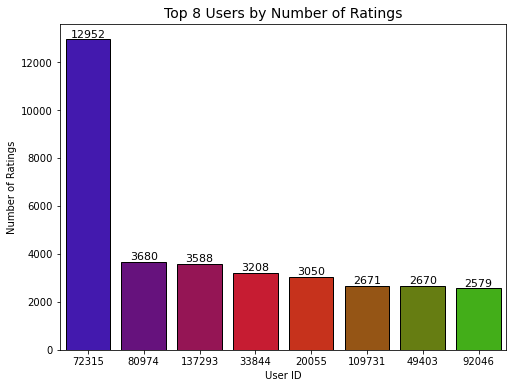

In [26]:
user_ratings_count(train_df,8)

Fig 1. User 72315 has rated an extreme number of movies relative to other users. For EDA purposes, this user is removed to make interpretation easier.

In [27]:
# Exclude user 72315 for EDA
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


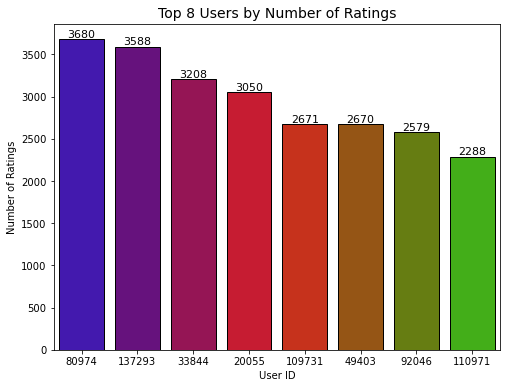

In [28]:
user_ratings_count(eda_df,8)

In [29]:
# How many ratings have we lost?
34398-23734

10664

In [30]:
# How many movies were only rated by our outlier?
48213-45844

2369

Our outlier user clearly rated quite a few movies. The loss of unique ratings indicates that he could've been the only person watching those movies. This would cause the recommender to use him as a baseline for those movies.

Q: How do users tend to rate movies?

In [31]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        column (str): column to plot
    Returns
    -------
        distplot (NoneType): distplot of rating frequencies
    """
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

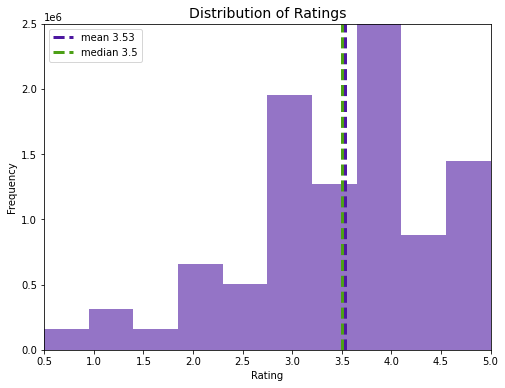

In [32]:
ratings_distplot(eda_df)

It is interesting that the ratings are left-skewed. It was expected that there would be a normal distrubtion with a mean rating of 3. Instead, we observe that users tend to rate movies quite favourably and tend to avoid negative ratings. This skew might be explained by the tendency of users to rate movies they liked. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end, let alone rate it.

Q: Is there a relationship between the number of movies a user has rated and the rating that they give?

In [47]:
def mean_ratings_scatter(df, color='Violet', column='userId'):
    """
    Make scatterplots of mean ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        color (str): plot colour
        column (str): column to plot
    Returns
    -------
        scatterplot (NoneType): scatterplot of mean number of ratings
    """
    plt.figure(figsize=(6,4))
    mean_ratings = df.groupby(f'{column}')['rating'].mean()
    user_counts = df.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

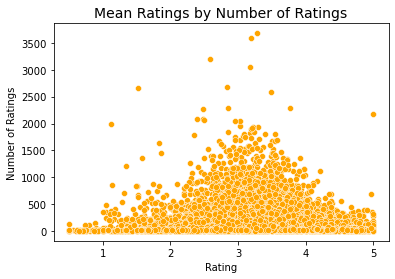

In [48]:
# Mean user ratings by number of ratings
mean_ratings_scatter(eda_df,'Orange')

There doesn't seem to be a relationship, as the number of ratings and how a user rates a movie do not show any correlation.

Q: Is there a relationship between the number of ratings a movie has and how highly it is rated?

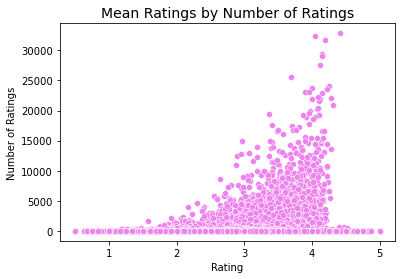

In [49]:
# Mean movie ratings by number of ratings
mean_ratings_scatter(eda_df, column='movieId')

This time we do see a relationship, The more ratings a movie has, the more highly it is likely to be rated. This confirms our intuitive understanding that the more highly rated a movie is, the more likely is that viewers will recommend the movie to each other. In other words, people generally try to avoid maing bad recommendations

Q: Which are the best and worst rated movies of all time?

In [40]:
def plot_ratings(count, n, color='pink', best=True, method='mean'):
    """
    Make scatterplots of ratings.
    Parameters
    ----------
        count (int): number of ratings threshold
        n (int): number of movies
        color (str): plot colour
        best (bool): column to plot
        method (str): statistical measure
    Returns
    -------
        scatterplot (NoneType): scatterplot of mean number of ratings
    """
    # What are the best and worst movies
    # Creating a new DF with mean and count
    if method == 'mean':
        movie_avg_ratings = pd.DataFrame(eda_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_ratings = pd.DataFrame(eda_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].median())
    movie_avg_ratings['count'] = eda_df.groupby('movieId')['userId'].count().values
    movie_avg_ratings.reset_index(inplace=True)
    movie_avg_ratings.set_index('movieId', inplace=True)

    # Remove movies that have been rated fewer than n times
    data = movie_avg_ratings[movie_avg_ratings['count']>count]
    data.sort_values('rating', inplace= True,ascending=False)
    if best == True:
        plot = data.head(n).sort_values('rating', ascending=True)
        title='Best Rated'
    else:
        plot = data.tail(n).sort_values('rating', ascending=False)
        title='Worst Rated'
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=plot['rating'], y=plot['title'], size=plot['count'], color=color)
    plt.xlabel('Rating')
    plt.ylabel('')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.title(f'Top {n} {title} Movies with Over {count} Ratings', fontsize=14)
    plt.show()

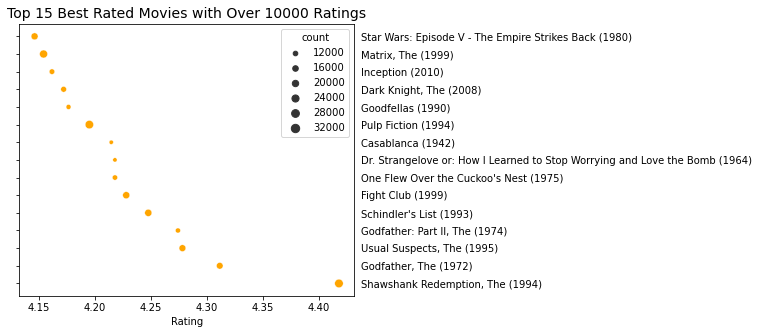

In [46]:
# What are the top 10 highest rated titles?
plot_ratings(10000, 15, 'Orange', True, 'mean')

By filtering movies with less than 10000 ratings, we find that the most popular movies are unsurprising titles. The Shawshank Redemption and The Godfather unsurprisingly top the list. What is interesting is that Movies made post 2000 don't feature often. Do users have a preference to Older movies?

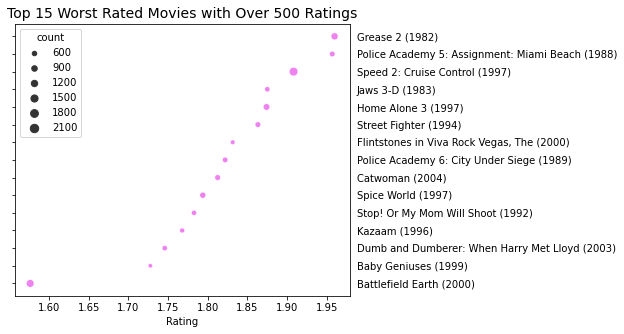

In [43]:
# What are the 10 worst rated titles?
plot_ratings(500, 15,'violet', False, 'mean')

Obviously, people did not like Battlefield too much and with 1200 ratings, they really wanted it to be known. It is interesting how many sequels appear in the list

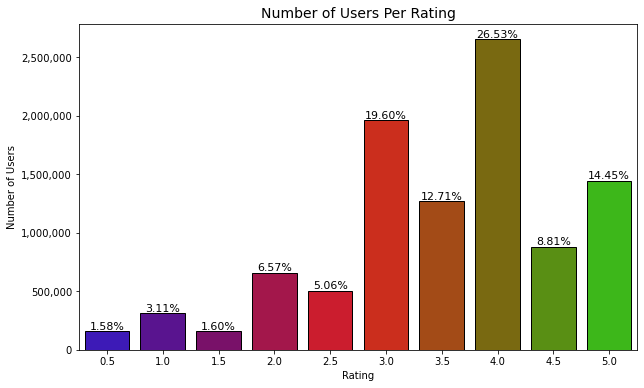

In [50]:
movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="brg", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

Percentage of users per rating, most movies get a rating of 4.0.

### Genres

In [51]:
# function that hasn't found a use yet - it was usefull in the app!!
def feat_extractor(df, col):
    """
    Returns a list of all unique features in a DataFrame columns separated by "|"
    """
    df.fillna("", inplace=True)
    feat_set = set()
    for i in range(len(df[f'{col}'])):
        for feat in df[f'{col}'].iloc[i].split('|'):
            feat_set.add(feat)
    return sorted([feat for feat in feat_set if feat != ""])

In [52]:
genres = feat_extractor(movies_df, 'genres')

Q: Which genres are the most commonly observed?

In [53]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    ----------
        df (DataFrame): input DataFrame containing movie metadata
        column (str): target column to extract features from
    Returns
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [54]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='brg', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

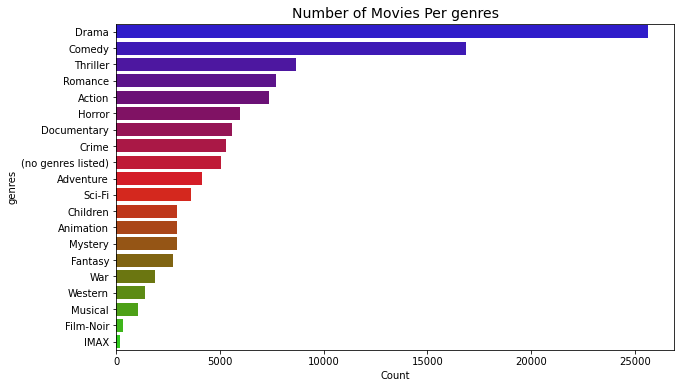

In [55]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Drama is the most frequently occuring genre in the database. Approximately 5000 movies have missing genres. We can use the IMDB and TMDB ID's together with the APIs to fill missing data. Further, IMAX is not a genre but rather a proprietary system for mass-viewings.

The above figure does not tell us anything about the popularity of the genres, lets calculate a mean rating and append it to the data

In [63]:
def mean_calc(feat_df, ratings = eda_df, movies = movies_df, metadata = imdb_df, column = 'genres'):
    mean_ratings = pd.DataFrame(ratings.join(movies, on='movieId', how='left').groupby(['movieId'])['rating'].mean())
    movie_eda = movies.copy()
    movie_eda = movie_eda.join(mean_ratings, on = 'movieId', how = 'left')

    # Exclude missing values
    movie_eda = movie_eda
    movie_eda2 = movie_eda[movie_eda['rating'].notnull()]

    means = []
    for feat in feat_df[f'{column}']:
        mean = round(movie_eda2[movie_eda2[f'{column}'].str.contains(feat)]['rating'].mean(),2)
        means.append(mean)
    return means

In [64]:
genres['mean_rating'] = mean_calc(genres)

In [65]:
genres.sort_values('mean_rating', ascending=False).head(5)

,genres,count,mean_rating
14,Documentary,5605,3.40
18,Film-Noir,353,3.39
15,War,1874,3.30
13,IMAX,195,3.25
6,Drama,25606,3.23


Film-Noir describes Hollywood crime dramas, particularly those that emphasize cynical attitudes and sexual motivations. The 1940s and 1950s are generally regarded as the "classic period" of American film-noir. These movies have the highest ratings but this may be as a result of it's niche audence. The same logic can be applied to IMAX movies, as such, we will only include genres with a count of 500 or more.

In [66]:
def genre_popularity(df):
    """
    Plots the mean rating per genre.
    """
    count_filt = 500
    plt.figure(figsize=(10,6))
    plot_data = df[df['count']>count_filt]
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = plot_data['mean_rating'].max()
    sns.barplot(y = plot_data['genres'], x = plot_data['mean_rating'], order = plot_data['genres'], orient='h',palette='brg')
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per Genre', fontsize=14)
    plt.ylabel('Genre')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

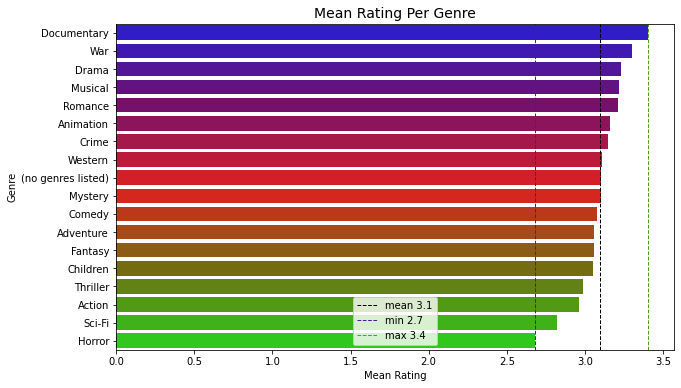

In [67]:
genre_popularity(genres.sort_values('mean_rating', ascending=False))

The scores are almost evenly distributed with the exceptions of Documentaries, War, Drama, Musicals, and Romance and Thriller, Action, Sci-Fi, and Horror, which rate higher than average and far below average respectively.  

We can also visualuse the distribution of ratings per genre with a boxplot.

In [68]:
box = mean_ratings.join(movies_df)
box['genres'] = box['genres'].str.replace('|', ',')
box['genres'] = box['genres'].apply(lambda x: x.split(","))
box = box.explode('genres')
box = box[box['genres']!='(no genres listed)']

fig,axis = plt.subplots(figsize=(10, 8))
sns.boxplot(y=box['genres'], x=box['rating'], palette="brg", orient='h', showfliers = False)
plt.title("Distribution of Ratings Per Genre", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.show()

NameError: name 'mean_ratings' is not defined

### IMDB Metadata

#### Directors

Q: Who are the most common directors?

In [69]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

Some movies do not have a director listed. once again, the IMDB API can be used to retrieve this data

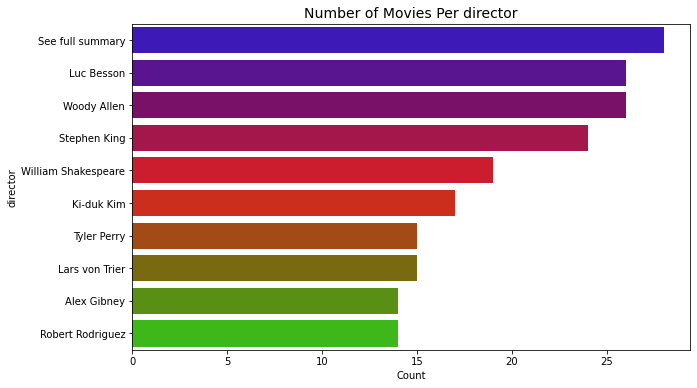

In [70]:
feature_count(directors.head(10), 'director')

Once again we need to calculate a mean rating for each director in order to determine who is the most popular

In [71]:
def dir_mean(df):
    df.set_index('director', inplace=True)

    direct_ratings = []
    directors_eda = eda_df.join(imdb_df, on = 'movieId', how = 'left')
    for director in df.index:
        rating = round(directors_eda[directors_eda['director']==director]['rating'].mean(),2)
        direct_ratings.append(rating)
    df['mean_rating'] = direct_ratings
    return df.sort_values('mean_rating', ascending = False)

In [72]:
directors = dir_mean(directors)

In [73]:
directors.head()

,count,mean_rating
director,,
Stephen King,24,4.05
Quentin Tarantino,10,3.94
John Sayles,11,3.93
Ki-duk Kim,17,3.89
Pedro Almodóvar,11,3.85


In [74]:
def feat_popularity(df, title = 'feat'):
    """
    Plots the mean rating per director.
    """
    plt.figure(figsize=(10,6))
    plot_data = df.copy()
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = round(plot_data['mean_rating'].max(),2)
    sns.barplot(y = plot_data.index, x = plot_data['mean_rating'], order = plot_data.index, orient='h',palette='brg')
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per {title}', fontsize=14)
    plt.ylabel(f'{title}')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

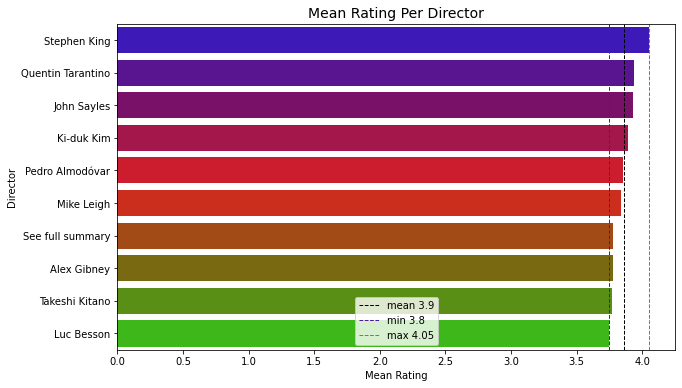

In [75]:
feat_popularity(directors.head(10), 'Director')

Immediately, we see some very well known names, Stephen King and Quentin Tarantino are unsurprisingly top of the list. It begs the question, who are the worst rated directors?

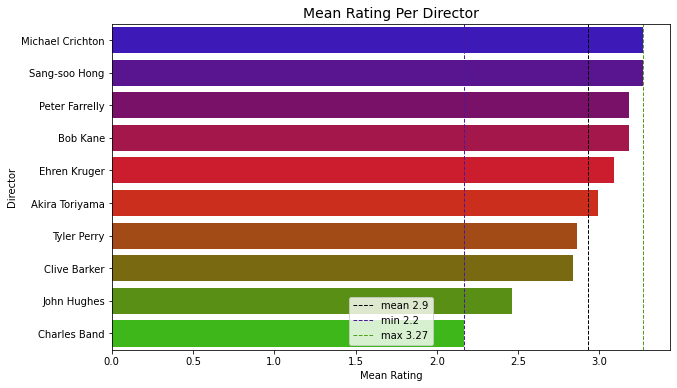

In [76]:
feat_popularity(directors.tail(10), 'Director')

It is unfortunate to find Tyler Perry and Akira Toriyama so poorly rated. Tyler Perry is best known for his Madea series of movies. As we saw from the least popular movies, sequels do not perform well and Madea has numerous sequels.

Akira Toriyama is the Manga artist behind the Dragon Ball franchise. Dragonball is important to Anime communities because it popularized anime in the west. However, despite its loyal fan base, it remains far from being the best anime.

<a id="preprocessing"></a>
## 4. Data Preprocessing

### Multidimensional Scaling
Multidimensional scaling (MDS) is a technique for visualizing distances between objects on a map, where the distance is known between pairs of the objects.  
> "The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the two distributions with respect to the locations of the points in the map. Note that whilst the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate." [[3]](#ref3)

In [77]:
# Subset the data to cut down computation time for now
genome_score = genome_scores[:10000000]

In [78]:
# Although scores are in the range of 0-1, there is no harm in scaling
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(genome_score.sample(frac=0.0001))

In [79]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)

In [80]:
tsne.fit(mds_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.088s...
[t-SNE] Computed neighbors for 1000 samples in 0.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.063221
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 84.5579071, gradient norm = 0.0000241 (50 iterations in 0.674s)
[t-SNE] Iteration 100: error = 84.5579071, gradient norm = 0.0000039 (50 iterations in 0.313s)
[t-SNE] Iteration 150: error = 84.5579071, gradient norm = 0.0000050 (50 iterations in 0.279s)
[t-SNE] Iteration 200: error = 84.5579071, gradient norm = 0.0000109 (50 iterations in 0.282s)
[t-SNE] Iteration 250: error = 84.5579071, gradient norm = 0.0000316 (50 iterations in 0.278s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.557907
[t-SNE] Iteration 300: error = 4.5615716, gradient norm = 0.0000506 (50 iterations in 0.281s)
[t-SNE] Iteration 350: error = 4.5615697, gradient norm = 0.00013

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

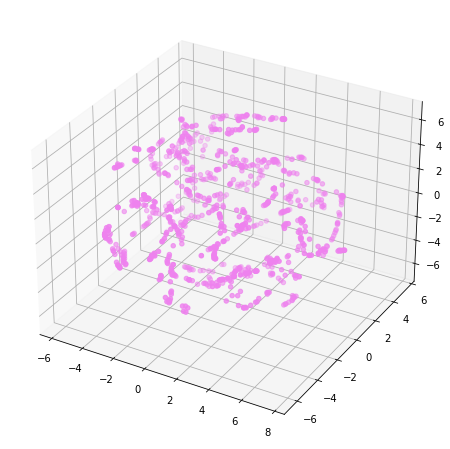

In [81]:
Axes3D

fig = plt.figure(figsize=(15, 8))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color='violet')
plt.show()

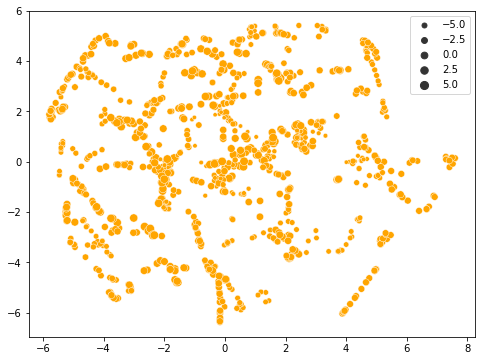

In [87]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2],color='Orange')
plt.show()

### Principal Component Analysis
Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. [[4]](#ref4)

In [88]:
# Manually pivot table as data is too large for in-built functions
def pivot_(df):
    """
    Pivots table.
    """
    new_dict = {'movieId':sorted(set(df.index))}
    pivoted = pd.DataFrame(new_dict)
    tagids = sorted(set(df['tagId']))
    for Id in range(len(tagids)):
        pivoted[f'{Id+1}'] = list(df[df['tagId'] == Id+1]['relevance'])
    return pivoted

In [89]:
pca_data_pivoted = pivot_(genome_scores).set_index('movieId')

In [90]:
pca_data_pivoted.shape

(13816, 1128)

Lets make this more readable

In [91]:
pca_data_pivoted.columns = list(genome_tags['tag'])

In [92]:
pca_data_pivoted.head()

,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [93]:
features = [col for col in pca_data_pivoted.columns]

#### Scales of measurement
It is important that we scale the data before dimensionality reduction.

Although all variables are measured on the same scale (0-1), there shouldn't be any downside to setting the mean to zero and standard deviation to 1

In [94]:
cf.set_config_file(offline=True, world_readable=True, theme='white')
columns = random.sample(range(0, 1129), 20)
pca_data_pivoted.iloc[:,columns].iplot(kind='box', title="Boxplots of Features (Unscaled)")

NameError: name 'cf' is not defined

In [95]:
def scaler(df):
    """
    Scales data.
    """
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [96]:
pca_scaled = scaler(pca_data_pivoted)

In [97]:
scaled_pca = pd.DataFrame(pca_scaled, index = pca_data_pivoted.index, columns = pca_data_pivoted.columns)

In [98]:
cf.set_config_file(offline=True, world_readable=True, theme='white')
# using plotly to plot the boxplot
scaled_pca.iloc[:,columns].iplot(kind='box', title="Boxplots of Features (Scaled)")

NameError: name 'cf' is not defined

Text(0, 0.5, 'Cumulative explained variance')

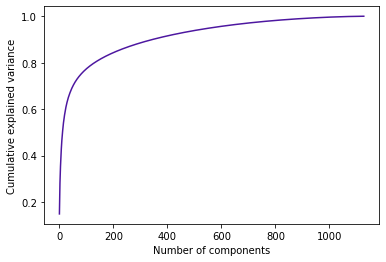

In [99]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(pca_data_pivoted[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp,
                      index=pca_data_pivoted.index, columns=pca_data_pivoted.columns
                     )

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='#4D17A0')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [100]:
pca_75 = PCA(.80)
pca_75_df = pca_75.fit_transform(pca_data_pivoted)
print(round(pca_75.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_75.n_components_,
      "components.")

80.0 % of variance explained by 131 components.


The cummulative explained variance shows an initially steep then gradual curve and not the sharp elbow we were expecting. This could be a result of the genomes already having been chosen as the principle components of movies. However we can see that 80% of the variance in the movie dataset is explained by 131 components. We should use only these components for computatonal efficiency in a content based model

In [101]:
pca_75_df = pd.DataFrame(pca_75_df, index = pca_data_pivoted.index)
pca_75_df.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.796514,2.212839,-2.489444,1.624747,0.984763,1.168046,-0.203300,1.659382,-0.675962,-1.251265,...,-0.166531,0.023522,0.124865,0.091553,-0.014734,-0.082235,0.029796,-0.077556,-0.072878,-0.094931
2,-1.541922,1.597864,-1.113613,1.302526,-0.196336,0.191809,-0.026161,1.208987,-0.369388,-0.483199,...,0.026369,-0.088038,0.113610,-0.050569,-0.015265,0.067904,0.026488,0.013665,0.079228,-0.130822
3,-1.506092,-0.010220,-0.605981,-0.316252,0.330972,0.334078,0.048253,0.010072,-0.042318,0.040345,...,0.060794,-0.101178,0.033077,0.073228,-0.010904,-0.094919,0.019864,0.004834,0.059739,0.035608
4,-1.293604,-0.775662,-0.926582,-0.384600,0.103713,-0.345682,0.683775,0.218370,-0.159426,0.639183,...,-0.036119,-0.145511,0.102927,-0.103027,0.005975,0.053953,0.044405,-0.202070,-0.158430,0.007054
5,-1.694557,-0.185986,-1.204239,-0.149549,0.470713,0.053199,0.385026,0.302557,-0.133082,-0.083749,...,0.016023,0.069098,-0.017486,0.005937,0.127657,-0.019529,-0.327449,-0.137680,-0.053703,0.065995


### Cluster Analysis

In [102]:
# Manually implement the WCSS
def within_cluster_variation(df, label_col='cluster_label'):
    """
    Manually implements the WCSS.
    """
    centroids = df.groupby(label_col).mean()
    out = 0
    for label, point in centroids.iterrows():
        df_features = df[df[label_col] == label].drop(label_col, axis=1)
        out += (df_features - point).pow(2).sum(axis=1).sum()
    return out

In [103]:
# let's try everything between 2 and 18 clusters where 18 is the number of genres
n_clusters = np.arange(2, 19)

# store errors for each value of k
errors = []

# for i between 2 and 19
for k in n_clusters:
    print(f'training model with {k} clusters')
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(pca_75_df)
    
    # measure BCSS
    print(f'evaluating model with {k} clusters')
    y_preds = km.predict(pca_75_df)
    pca_75_df = pd.DataFrame(pca_75_df)
    pca_75_df['cluster_label'] = y_preds
    errors.append(within_cluster_variation(pca_75_df, 'cluster_label'))
    print(errors[-1])

training model with 2 clusters
evaluating model with 2 clusters
167610.0995154784
training model with 3 clusters
evaluating model with 3 clusters
159202.0471645221
training model with 4 clusters
evaluating model with 4 clusters
153979.41324329138
training model with 5 clusters
evaluating model with 5 clusters
149074.88861234664
training model with 6 clusters
evaluating model with 6 clusters
145054.806619738
training model with 7 clusters
evaluating model with 7 clusters
141701.33766919657
training model with 8 clusters
evaluating model with 8 clusters
139251.2516964227
training model with 9 clusters
evaluating model with 9 clusters
137033.02607491956
training model with 10 clusters
evaluating model with 10 clusters
135148.42670872985
training model with 11 clusters
evaluating model with 11 clusters
132591.03261600249
training model with 12 clusters
evaluating model with 12 clusters
130792.51569023244
training model with 13 clusters
evaluating model with 13 clusters
129498.18906177202
t

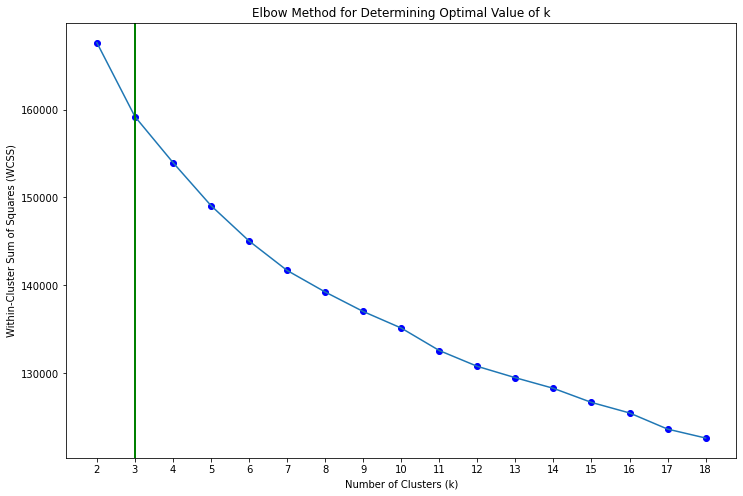

In [105]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors, color="blue")
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.axvline(x=3, color='green', lw=2)
plt.show()

In [106]:
K = 3
# Remember to set the random state for reproducibility
km = KMeans(n_clusters=K, verbose=0, random_state=42)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(pca_75_df)
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with KMeans(n_clusters=3, random_state=42)
done in 0.429s


In [107]:
# Obtain cluster memberships for each item in the data
y_preds = km.predict(pca_75_df)
pca_75_df['cluster_label'] = y_preds
centers = km.cluster_centers_

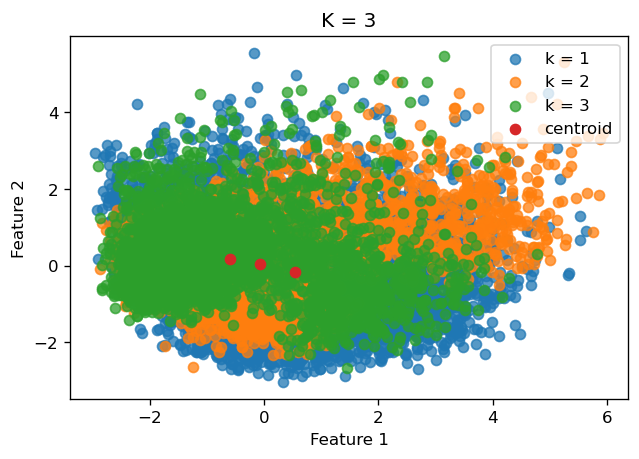

In [108]:
plt.figure(dpi=120)
for k in range(K):
    x1 = pca_75_df[pca_75_df['cluster_label'] == k][0]
    x2 = pca_75_df[pca_75_df['cluster_label'] == k][1]
    plt.scatter(x1, x2, label="k = "+str(k+1),alpha=0.75)
# Show cluster centroid locations    
plt.scatter(centers[:,0],centers[:,1],label="centroid")
plt.legend()
plt.title(f"K = {K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<a id="modelling"></a>
## 5. Modelling

To reduce computation time, we train and evaluate the following models on a 100k subset of the data. The best performing model will be trained on the whole dataset to predict the ratings for the final submission file.

In [112]:
# Load the 100k dataset
#train_df.drop('timestamp', axis=1, inplace=True)
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

NameError: name 'Reader' is not defined

### Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user [[5]](#ref5).

#### SVD

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset and was popularized by Simon Funk during the [Neflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize) contest [[6]](#ref6). In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.

In [ ]:
svd_test = SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9746


#### NormalPredictor  
The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.

In [ ]:
np_test = NormalPredictor()
np_test.fit(trainset)
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

RMSE: 1.4418


#### BaselineOnly  
The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS).

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9735


#### NMF  
NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [ ]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1597


#### SlopeOne  
The SlopeOne algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem. 

In [ ]:
slo_test = SlopeOne()
slo_test.fit(trainset)
predictions = slo_test.test(testset)
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


#### CoClustering  
The Co-clustering algorithm assigns clusters using a straightforward optimization method, much like k-means.

In [ ]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


### Content-based Filtering  
Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document [[7]](#ref7). In the following section, the model uses genres as keywords to recommend similar movies based on input from a user. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

In [ ]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm.

    Parameters
    ----------
    subset_size : int
        Number of movies to use within the algorithm.

    Returns
    -------
    Pandas Dataframe
        Subset of movies selected for content-based filtering.

    """
    # Split genre data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset
 
def content_model(movie_list,top_n=10): 
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index = data.index, columns = data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

In [ ]:
movies = movies_df.dropna()
movie_list = ['Grumpier Old Men (1995)','Ace Ventura: When Nature Calls (1995)','Father of the Bride Part II (1995)']
content_model(movie_list,top_n=10)

['Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994)',
 'Secret of Roan Inish, The (1994)',
 'Stargate (1994)',
 'Tales from the Hood (1995)',
 'Virtuosity (1995)',
 'Bitter Moon (1992)',
 'Clear and Present Danger (1994)',
 'Being Human (1993)',
 'Beverly Hillbillies, The (1993)',
 'Heaven & Earth (1993)']

<a id="evaluation"></a>
## 6. Performance Evaluation

We built and tested six different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$   

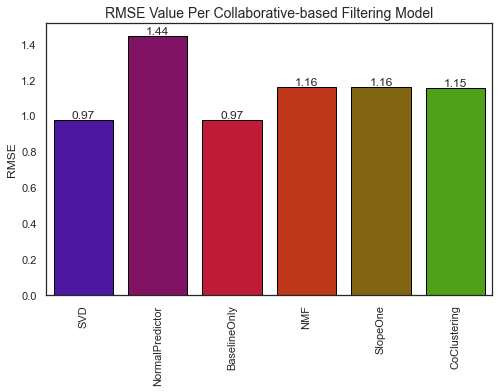

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','CoClustering']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse,slo_rmse,cc_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

### Cross Validation

Cross validation is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation on our two best perfoming models, i.e. **SVD** and **BaselineOnly**.

**SVD**

In [ ]:
svd_test = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state=42)
# Run 5-fold cross-validation and print results
a = cross_validate(svd_test, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9611  0.9661  0.9770  0.9678  0.9734  0.9691  0.0056  
Fit time          27.52   26.57   24.28   36.59   42.80   31.55   7.01    
Test time         0.19    0.14    0.17    0.29    0.47    0.25    0.12    


**BaselineOnly**

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
# Run 5-fold cross-validation and print results
b = cross_validate(blo_test, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9634  0.9682  0.9678  0.9755  0.9631  0.9676  0.0045  
Fit time          2.67    2.22    2.04    2.27    1.65    2.17    0.33    
Test time         0.33    0.29    0.19    0.23    0.14    0.23    0.07    


<a id="analysis"></a>
## 7. Model Analysis

In [ ]:
# Load the 100k dataset
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### Hyperparameter Tuning 

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process. We tested multiple parameters for our best performing model (i.e. **SVD**).

In [ ]:
param_grid = {'n_epochs':[40], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9676524074010132
***Best parameters:***
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


### Results

In [ ]:
svd_test = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9734


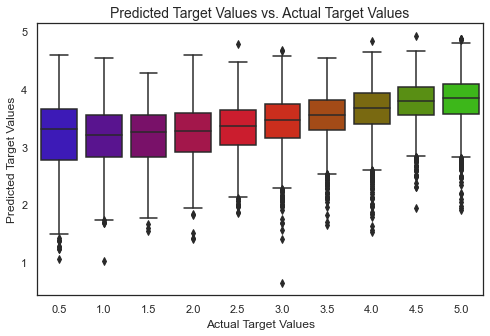

In [ ]:
# Predicted Target Values vs. Actual Target Values
new_df = pd.DataFrame(columns=['uid', 'iid', 'rating'])
i = 0
for (uid, iid, rating) in testset:
    new_df.loc[i] = [uid, iid, rating]
    i = i+1
true = new_df['rating']
pred = []
for i in predictions:
    pred.append(i.est)
fig,axis = plt.subplots(figsize=(8, 5))
sns.boxplot(x=true, y=pred, palette="brg")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.show()

In [ ]:
# params = {'n_epochs':40, #[30,40,50],
#           'n_factors':400, #[100,200,300],
#           'init_std_dev':0.005, #[0.005,0.05,0.1],
#           'random_state':[42]} 
# metrics = {"RMSE": np.sqrt(mean_squared_error(true, pred))}

# experiment.log_parameters(params)
# experiment.log_metrics(metrics)
# experiment.end()

<a id="conclusion"></a>
## 8. Conclusion
In this project, we succeeded in building an unsupervised machine learning model that is able to recommend movies based on content-based or collaborative filtering and is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. Our top performing model has a root mean squared error (RMSE) of 0.78, based on a testing set submitted to the EDSA [Kaggle](https://www.kaggle.com/c/edsa-recommender-system-predict/leaderboard) competition.  


The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

<a id="save"></a>
## 9. Save Output

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("Team_RM4_submission.csv", index=False)

In [ ]:
# Save model
# model_save_path = "SVD.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(svd,file)

In [ ]:
# experiment.display()

<a id="ref"></a>
## 10. References
<a id="ref1"></a>[1] Ansari, A. (n.d.). Internet Recommendation Systems. Retrieved August/September, 2000, from https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/385/Internet Recommendation Systems.pdf

<a id="ref2"></a>[2] Shi, C. (2017, June 27). A Hybrid Recommender with Yelp Challenge. Retrieved from https://nycdatascience.com/blog/student-works/yelp-recommender-part-1/

<a id="ref3"></a>[3] Wikipedia: t-distributed stochastic neighbor embedding. Retrieved from https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

<a id="ref4"></a>[4] Jolliffe, I.T. & Cadima, J. (2016, April 13). Principal component analysis: a review and recent developments. Retrieved from https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

<a id="ref5"></a>[5] Ajitsaria, A. (n.d.). Build a Recommendation Engine With Collaborative Filtering. Retrieved from https://realpython.com/build-recommendation-engine-collaborative-filtering

<a id="ref6"></a>[6] Funk, S. (2006, Deccember 11). Netflix Update: Try This at Home. Retrieved from https://sifter.org/simon/journal/20061211.html

<a id="ref7"></a>[7] Recommender Systems: Content-based Filtering. Retrieved from http://recommender-systems.org/content-based-filtering/

[Back to top ↑](#top)